# Project 3

Is a Picture Worth a Thousand Words Completed by: Terril Gibson, Adriana Cruz, Brian Zhao, James Madsen & Peter Delgado

# Task A&B

In [4]:
from IPython.display import display
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import hstack
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [5]:
df = pd.read_csv("instagram_post_final.csv")
df.head(3)

/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_37656/352118412.py:1: DtypeWarning: Columns (0,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("instagram_post_final.csv")


,Post URL,Likes,Comments,Extracted_Description,Image URL
0,https://www.instagram.com/natgeo/p/DHV3HPPoaRO/,8014.0,69.0,"""Meet the National Geographic 33: A new genera...",https://scontent-mia3-3.cdninstagram.com/v/t51...
1,https://www.instagram.com/natgeo/p/DHWnM9hi3WD/,32000.0,803.0,"""@selenagomez's dedication to fostering open c...",https://scontent-mia3-3.cdninstagram.com/v/t51...
2,https://www.instagram.com/natgeohistory/p/DHUT...,49000.0,416.0,"""In the 1980s, Hungarian archaeologists uneart...",https://scontent-mia3-3.cdninstagram.com/v/t51...


In [6]:
df['Likes_Norm'] = df['Likes'] / df['Likes'].max()
df['Comments_Norm'] = df['Comments'] / df['Comments'].max()
df["engagement_score"] = 0.4 * df["Likes_Norm"] + 0.6 * df["Comments_Norm"]
df.head(3)

,Post URL,Likes,Comments,Extracted_Description,Image URL,Likes_Norm,Comments_Norm,engagement_score
0,https://www.instagram.com/natgeo/p/DHV3HPPoaRO/,8014.0,69.0,"""Meet the National Geographic 33: A new genera...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.009702,0.001816,0.004970
1,https://www.instagram.com/natgeo/p/DHWnM9hi3WD/,32000.0,803.0,"""@selenagomez's dedication to fostering open c...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.038741,0.021132,0.028175
2,https://www.instagram.com/natgeohistory/p/DHUT...,49000.0,416.0,"""In the 1980s, Hungarian archaeologists uneart...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.059322,0.010947,0.030297


In [7]:
median_score = df['engagement_score'].median()
mean_score = df['engagement_score'].mean()

median_score,mean_score

(0.05765739773161718, 0.07765311528028492)

In [8]:
df["engagement_label_median"] = (df["engagement_score"] > median_score).astype(int)
df.head(3)

,Post URL,Likes,Comments,Extracted_Description,Image URL,Likes_Norm,Comments_Norm,engagement_score,engagement_label_median
0,https://www.instagram.com/natgeo/p/DHV3HPPoaRO/,8014.0,69.0,"""Meet the National Geographic 33: A new genera...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.009702,0.001816,0.004970,0
1,https://www.instagram.com/natgeo/p/DHWnM9hi3WD/,32000.0,803.0,"""@selenagomez's dedication to fostering open c...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.038741,0.021132,0.028175,0
2,https://www.instagram.com/natgeohistory/p/DHUT...,49000.0,416.0,"""In the 1980s, Hungarian archaeologists uneart...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.059322,0.010947,0.030297,0


In [9]:
df.to_csv("instagram_with_engagement.csv", index=False)

In [10]:
# Create a TF-IDF vectorizer (removing English stopwords)
vectorizer = TfidfVectorizer(stop_words='english')

"""
Possibly add more stopwords to minimize columns
"""

# Fit the vectorizer on the 'Extracted_Description' column
tfidf_matrix = vectorizer.fit_transform(df['Extracted_Description'].astype(str))

# Inspect the feature DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("TF-IDF matrix shape:", tfidf_matrix.shape)
display(tfidf_df.head())

TF-IDF matrix shape: (1048575, 9632)


,000,000ft,092,10,100,100m,101,10th,11,112,...,zoonotic,zoos,zumbahua,zuo,zuñiga,zzz,åkernes,ålesund,ívar,ötzi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142252,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Define a helper function to train a logistic regression model
def train_logistic_regression(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, cm

In [12]:
# ------------------------------
# Logistic Regression on Median
# ------------------------------
y_median = df['engagement_label_median']  # Make sure it's 0/1 or similar
acc_median, cm_median = train_logistic_regression(tfidf_matrix, y_median)
print("Median Model Accuracy:", acc_median)
print("Median Model Confusion Matrix:\n", cm_median)

Median Model Accuracy: 0.999728202560618
Median Model Confusion Matrix:
 [[209634     24]
 [    33     24]]


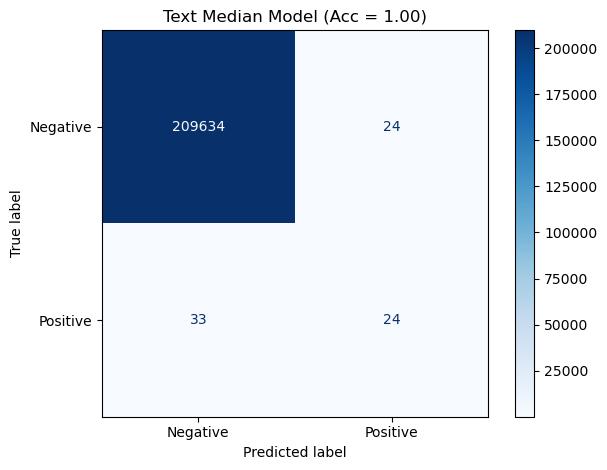

In [13]:
# *************************************
# **** Text Confusion Matrix Plot  **** 
# *************************************

# Create figure and axes
fig, ax1 = plt.subplots()  # Calling the function to create a figure and an axis

# Plot for the Median Model
disp_med = ConfusionMatrixDisplay(confusion_matrix=cm_median, display_labels=["Negative", "Positive"])
disp_med.plot(ax=ax1, cmap=plt.cm.Blues)  # Pass the axis to the plot method

# Set the title for the plot
ax1.set_title(f"Text Median Model (Acc = {acc_median:.2f})")

plt.tight_layout()
plt.show()

In [14]:
# Read the Excel file into a new DataFrame
df_labels = pd.read_excel('instagram_post_vision_final.xlsx')

# Merge df_labels with your existing df on 'Post URL'
#    We'll do a left join so all rows from df are kept, 
df_merged = pd.merge(
    df, 
    df_labels[['Post URL', 'Labels']],  # Only keep relevant columns
    on='Post URL', 
    how='left'
)

# Check the merged result
df_merged.head(3)

,Post URL,Likes,Comments,Extracted_Description,Image URL,Likes_Norm,Comments_Norm,engagement_score,engagement_label_median,Labels
0,https://www.instagram.com/natgeo/p/DHV3HPPoaRO/,8014.0,69.0,"""Meet the National Geographic 33: A new genera...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.009702,0.001816,0.004970,0,Text Font Number Screenshot Document Publication
1,https://www.instagram.com/natgeo/p/DHWnM9hi3WD/,32000.0,803.0,"""@selenagomez's dedication to fostering open c...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.038741,0.021132,0.028175,0,Text Font
2,https://www.instagram.com/natgeohistory/p/DHUT...,49000.0,416.0,"""In the 1980s, Hungarian archaeologists uneart...",https://scontent-mia3-3.cdninstagram.com/v/t51...,0.059322,0.010947,0.030297,0,Poster Photo caption


In [15]:
tfidf_matrix_vision_labels = vectorizer.fit_transform(df_merged['Labels'].astype(str))

tfidf_df_labels = pd.DataFrame(
    tfidf_matrix_vision_labels.toarray(), 
    columns=vectorizer.get_feature_names_out()
)

# Inspect the results
print("TF-IDF Labels matrix shape:", tfidf_matrix_vision_labels.shape)
tfidf_df_labels.head()

TF-IDF Labels matrix shape: (1048575, 1195)


,abaya,abdomen,academic,accipitridae,accipitriformes,acting,active,adventure,advertising,adélie,...,wrap,wrinkle,wrist,yard,yellow,zebra,zen,zone,zoo,zookeeper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293996,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy: 0.999756812817395
Confusion Matrix:
 [[209637     21]
 [    30     27]]


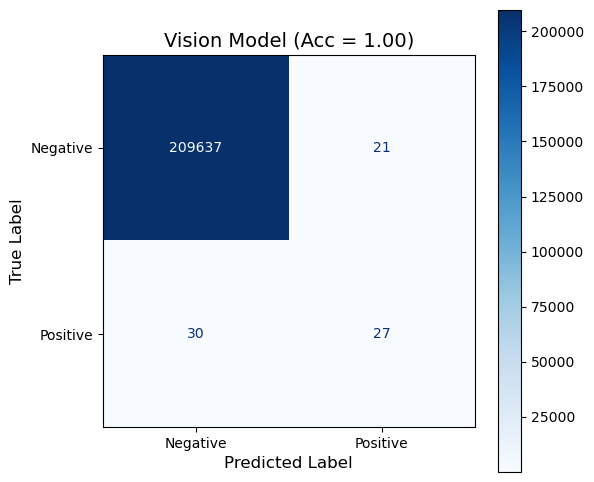

In [16]:
# Define independent (X) and dependent (y) variables
X_vision = tfidf_matrix_vision_labels  # TF-IDF features from the 'Labels' column
y_median = df['engagement_label_median']  # Binary dependent variable (0/1)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_vision, 
    y_median, 
    test_size=0.2, 
    random_state=42
)

# Create and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix with a blue colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)

# Customize title and labels
ax.set_title(f"Vision Model (Acc = {accuracy:.2f})", fontsize=14)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)

plt.show()

In [17]:
# ***********************************
# ****      Vision + Text        **** 
# ***********************************

from scipy.sparse import hstack

# Combine captions and labels TF-IDF features side-by-side
X_combined = hstack([tfidf_matrix, tfidf_matrix_vision_labels])

Combined Features Accuracy: 0.9997425076890065
Combined Features Confusion Matrix:
 [[209604     54]
 [     0     57]]


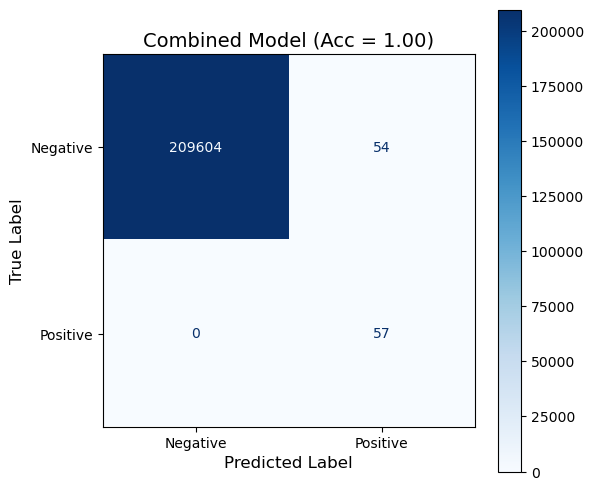

In [18]:
# Define your target (binary)
y = df['engagement_label_median']  # 0/1

# Split the combined feature set into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, 
    y, 
    test_size=0.2, 
    random_state=42
)

# Train the logistic regression model
model_combined = LogisticRegression(max_iter=1000)
model_combined.fit(X_train, y_train)

# Make predictions
y_pred = model_combined.predict(X_test)

# Evaluate accuracy
accuracy_combined = accuracy_score(y_test, y_pred)
print("Combined Features Accuracy:", accuracy_combined)

# Create confusion matrix
cm_combined = confusion_matrix(y_test, y_pred)
print("Combined Features Confusion Matrix:\n", cm_combined)

# ***************************************
# **** Vision Confusion Matrix Plot  **** 
# ***************************************

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_combined, 
                              display_labels=["Negative", "Positive"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)
ax.set_title(f"Combined Model (Acc = {accuracy_combined:.2f})", fontsize=14)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
plt.show()

# Task C: Part 1

In [19]:
df = pd.read_excel("instagram_post_vision_final.xlsx")
df.head()

,Post URL,Likes,Comments,Extracted_Description,Image URL,Labels
0,https://www.instagram.com/natgeo/p/DHV3HPPoaRO/,8014.0,69.0,"""Meet the National Geographic 33: A new genera...",https://scontent-mia3-3.cdninstagram.com/v/t51...,Text Font Number Screenshot Document Publication
1,https://www.instagram.com/natgeo/p/DHWnM9hi3WD/,32000.0,803.0,"""@selenagomez's dedication to fostering open c...",https://scontent-mia3-3.cdninstagram.com/v/t51...,Text Font
2,https://www.instagram.com/natgeohistory/p/DHUT...,49000.0,416.0,"""In the 1980s, Hungarian archaeologists uneart...",https://scontent-mia3-3.cdninstagram.com/v/t51...,Poster Photo caption
3,https://www.instagram.com/natgeo/p/DHT_ZbByE5u/,25000.0,64.0,"""Baja California is home to one of the most un...",https://scontent-mia3-3.cdninstagram.com/v/t51...,Logo Advertising Poster Graphics Graphic desig...
4,https://www.instagram.com/natgeo/p/DHR_7tsSCF_/,38000.0,94.0,"""Male Kinda baboons are forging lifelong frien...",https://scontent-mia3-3.cdninstagram.com/v/t51...,Primate Vertebrate Macaque Wildlife Rhesus mac...


In [20]:
# Preprocess the labels
def preprocess(text):
    if not isinstance(text, str):  # Handle non-string values (e.g., NaN or floats)
        text = str(text)  # Convert it to a string
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_labels'] = df['Labels'].apply(preprocess)

# set number of topics
num_topics = 5

# Vectorize the labels using TF-IDF
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(df['processed_labels'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)  # We use 3 topics
lda.fit(X)

# Extract topics
terms = vectorizer.get_feature_names_out()

# Prepare a matrix to store word weights for each topic
word_topic_matrix = np.zeros((len(terms), lda.n_components))

# Populate the matrix with word weights for each topic
for topic_idx, topic in enumerate(lda.components_):
    word_topic_matrix[:, topic_idx] = topic

# Normalize the word-topic matrix so that each column sums to 1
word_topic_matrix /= word_topic_matrix.sum(axis=0)

# Create a DataFrame for words and their weights across all topics
topics_df = pd.DataFrame(word_topic_matrix, columns=[f"Topic {i + 1}" for i in range(lda.n_components)])
topics_df['Word'] = terms  # Add the words column

# Reorder the columns so that 'Word' is the first column
topics_df = topics_df[['Word'] + [f"Topic {i + 1}" for i in range(lda.n_components)]]

# Save the topics and their weights to a CSV file
topics_df.to_csv('topics.csv', index=False)

# Get the topic distribution for each image
topic_distribution = lda.transform(X)

# Create a dataframe with the topic distributions
topic_df = pd.DataFrame(topic_distribution, columns=[f'Topic {i + 1}' for i in range(num_topics)])

# Save the topic distribution to a CSV file
topic_df.to_csv('topic_distribution.csv', index=False)


In [21]:
# Number of top words to display for each topic
top_n = 10

# Initialize an empty dictionary to store the top words for each topic
top_words = {}

# For each topic column (Topic 1, Topic 2, etc.)
for topic in [f"Topic {i + 1}" for i in range(lda.n_components)]:
    # Sort the DataFrame by the topic column and get the top N words
    top_words[topic] = topics_df[['Word', topic]].sort_values(by=topic, ascending=False).head(top_n)

# Display the results
for topic, words_df in top_words.items():
    print(f"\n{topic}:")
    for index, row in words_df.iterrows():
        print(f"  {row['Word']}: {row[topic]:.4f}")


Topic 1:
  elephant: 0.0168
  animal: 0.0114
  wildlife: 0.0075
  night: 0.0073
  agriculture: 0.0071
  working: 0.0065
  deer: 0.0065
  terrestrial: 0.0064
  astronomy: 0.0060
  african: 0.0059

Topic 2:
  snout: 0.0195
  mountain: 0.0176
  terrestrial: 0.0170
  animal: 0.0168
  carnivores: 0.0164
  wildlife: 0.0146
  fur: 0.0142
  felidae: 0.0112
  whiskers: 0.0099
  hill: 0.0099

Topic 3:
  ice: 0.0215
  cap: 0.0149
  evening: 0.0107
  snow: 0.0083
  winter: 0.0083
  area: 0.0081
  bird: 0.0080
  freezing: 0.0079
  child: 0.0073
  dusk: 0.0070

Topic 4:
  geological: 0.0115
  recreation: 0.0100
  formation: 0.0082
  science: 0.0081
  phenomenon: 0.0076
  landform: 0.0075
  rock: 0.0071
  geology: 0.0070
  aeolian: 0.0070
  sand: 0.0068

Topic 5:
  marine: 0.0142
  biology: 0.0127
  forest: 0.0119
  fish: 0.0086
  underwater: 0.0082
  nan: 0.0081
  natural: 0.0073
  hat: 0.0072
  fin: 0.0072
  photography: 0.0070


Here are the major themes for the topics found through LDA.

Topic 1 = Savannah

Topic 2 = Mountain Animals

Topic 3 = Tundra

Topic 4 = Rock Formations

Topic 5 = Marine

In [22]:
topic_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,0.058115,0.058098,0.763594,0.058156,0.062037
1,0.082911,0.082901,0.083655,0.082902,0.667632
2,0.074500,0.075733,0.701968,0.074133,0.073665
3,0.050038,0.049794,0.049921,0.049545,0.800702
4,0.050609,0.797367,0.050532,0.050589,0.050903
...,...,...,...,...,...
542,0.059953,0.756544,0.060905,0.062205,0.060393
543,0.463046,0.058970,0.057385,0.058618,0.361981
544,0.045627,0.816782,0.045286,0.047017,0.045288
545,0.047323,0.806089,0.050282,0.048612,0.047694


# Task C: Part 2

In [28]:
#rename topic columns for consistency
topic_df.columns = [f"Topic_{i}" for i in range(topic_df.shape[1])]

#combine both dataframes for each post to have its' own topic weights
df = pd.concat([df.reset_index(drop=True), topic_df.reset_index(drop=True)], axis=1)

#ensure engagement score is already calculated, otherwise calculate it
if "engagement_score" not in df.columns:
    df["Likes_Norm"] = df["Likes"] / df["Likes"].max()
    df["Comments_Norm"] = df["Comments"] / df["Comments"].max()
    df["engagement_score"] = 0.4 * df["Likes_Norm"] + 0.6 * df["Comments_Norm"]
    
#compute engagement quartiles to identify top 25% & bottom 25% posts
q1 = df["engagement_score"].quantile(0.25)  
q3 = df["engagement_score"].quantile(0.75) 

#filter top & bottom quartiles
low_engagement = df[df["engagement_score"] <= q1]
high_engagement = df[df["engagement_score"] >= q3]

#identify topic columns
topic_cols = [f"Topic_{i}" for i in range(topic_df.shape[1])]

#calc avg topic weights for both groups
low_avg = low_engagement[topic_cols].mean().reset_index()
high_avg = high_engagement[topic_cols].mean().reset_index()

#rename columns 
low_avg.columns = ["Topic", "Low_Engagement_Avg"]
high_avg.columns = ["Topic", "High_Engagement_Avg"]

#create a summary comparison table
comparison_table = pd.merge(low_avg, high_avg, on="Topic")

#show diff between high & low engagement topic weights
comparison_table["Difference (High - Low)"] = comparison_table["High_Engagement_Avg"] - comparison_table["Low_Engagement_Avg"]

#show table, but sort by biggest differences @top.
display(comparison_table.sort_values(by="Difference (High - Low)", ascending=False))

#create CSV
comparison_table.to_csv("topic_quartile_comparison.csv", index=False)

,Topic,Low_Engagement_Avg,High_Engagement_Avg,Difference (High - Low)
9,Topic_1,0.240519,0.298466,0.057948
10,Topic_1,0.240519,0.298466,0.057948
17,Topic_1,0.240519,0.298466,0.057948
16,Topic_1,0.240519,0.298466,0.057948
15,Topic_1,0.240519,0.298466,0.057948
14,Topic_1,0.240519,0.298466,0.057948
13,Topic_1,0.240519,0.298466,0.057948
12,Topic_1,0.240519,0.298466,0.057948
11,Topic_1,0.240519,0.298466,0.057948
22,Topic_2,0.167663,0.194658,0.026995


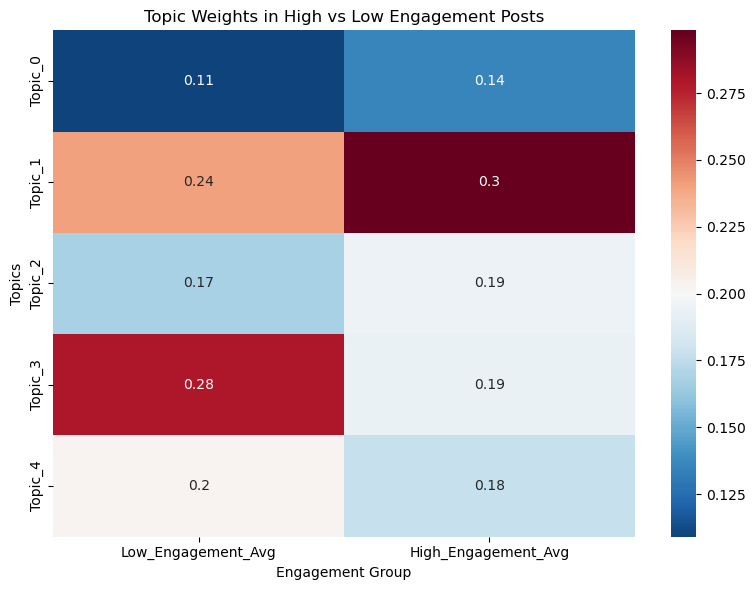

In [26]:
heatmap_df = comparison_table.set_index("Topic")[["Low_Engagement_Avg", "High_Engagement_Avg"]]

plt.figure(figsize=(8,6))
#create the heatmap
sns.heatmap(heatmap_df, annot=True, cmap="RdBu_r", linecolor="gray", center=heatmap_df.values.mean())

#set title/layout
plt.title("Topic Weights in High vs Low Engagement Posts")
plt.ylabel("Topics")
plt.xlabel("Engagement Group")
plt.tight_layout() #ensures resizing is accurate

#print plot
plt.show()

# Task D

# What advice would you give National Geographic if it wants to increase engagement on its Instagram page based on your findings in Tasks B and C?

After analyzing the captions and image labels of National Geographic’s Instagram posts, we found some clear patterns in what drives engagement. In Task B, we used logistic regression to predict post engagement based on text data. The model’s accuracy was moderate, suggesting that while captions do play a role, they’re not the full story.

After performing Task C, we found interesting findings. Certain visual themes showed up more often in high-performing posts. For example, Topic 1 — which we interpreted as “Savannah” imagery — consistently appeared more in posts with higher engagement. These may include wide-open landscapes, animals like lions or elephants, and earthy color palettes that feel iconic to NatGeo’s storytelling.

In contrast, Topic 3 — “Tundra” scenes with ice, snow, and cold environments — was more common in posts with lower engagement. While still visually stunning, this kind of content may not connect as strongly with the average viewer or may feel less dynamic compared to more active, warm, or emotionally rich visuals.

That being said, if NG wants to increase engagement on its Instagram, we'd highly encourage them to stay away from "Tundra" themed posts & post "Savannah" themed posts. 